In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#read dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

#dataset overview
print("Dataset Info:")
print(df.info())
print("\n Missing values:")
print(df.isnull().sum())

#drop missing values rows
df.dropna(inplace=True)

#show column names and a sample
print("\n Columns:")
print(df.columns)
print("\n Sample rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n


 Numeric Columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
 Categorical Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


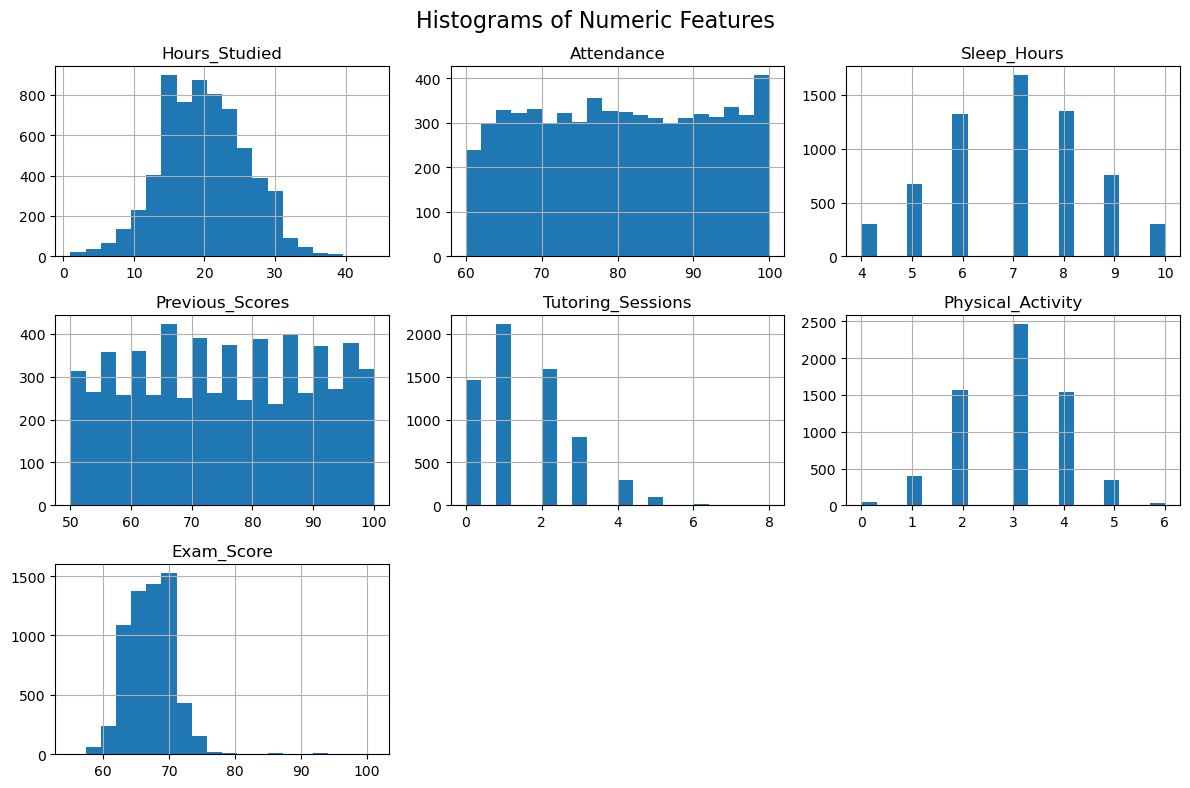

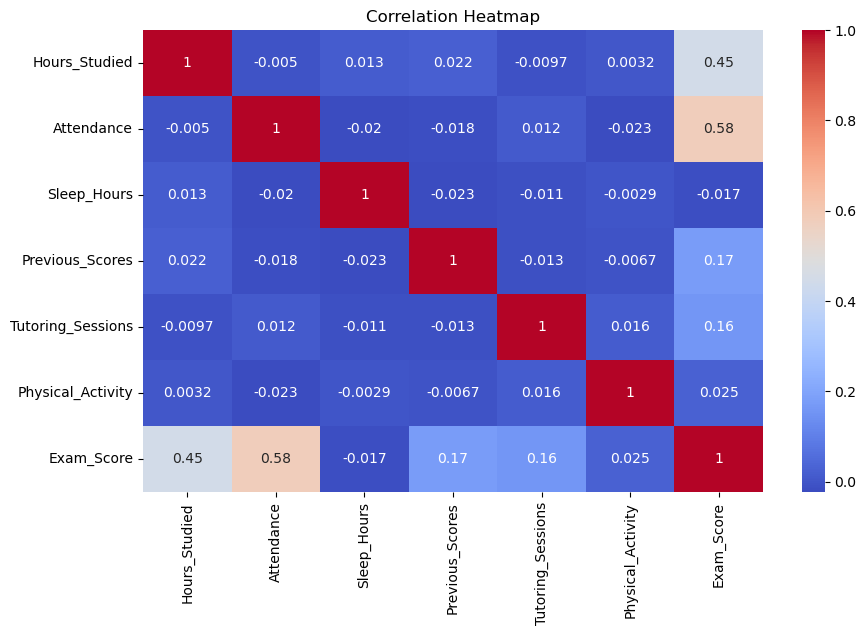


 Correlation with target:
 Exam_Score           1.000000
Attendance           0.580259
Hours_Studied        0.445104
Previous_Scores      0.174283
Tutoring_Sessions    0.156829
Physical_Activity    0.025148
Sleep_Hours         -0.017171
Name: Exam_Score, dtype: float64


In [5]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n Numeric Columns:", list(numeric_cols))
print(" Categorical Columns:", list(categorical_cols))

#Histogram of numeric features
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Let's assume the target is 'Exam_Score'
target = 'Exam_Score'
correlations = df[numeric_cols].corr()[target].sort_values(ascending=False)
print("\n Correlation with target:\n", correlations)

Categorical Columns to Encode: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

 Encoded DataFrame:
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  Parental_Involvement_Low  \
0                  3          67                      True   
1                  4          61                      True   
2   

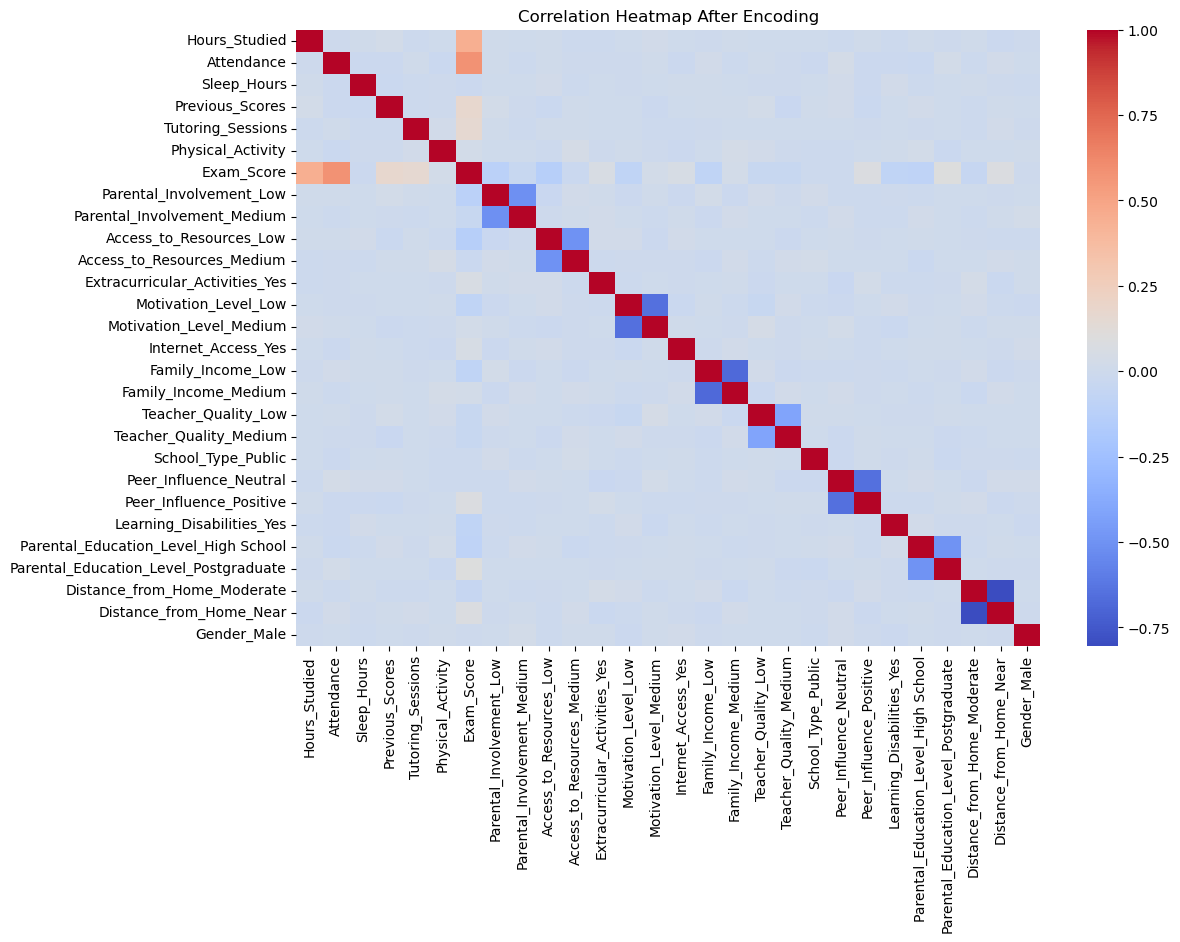

In [7]:
#identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns to Encode:", list(categorical_cols))

#encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#encode result
print("\n Encoded DataFrame:")
print(df_encoded.head())

#updated correlation heatmap with encoded data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Encoding")
plt.show()

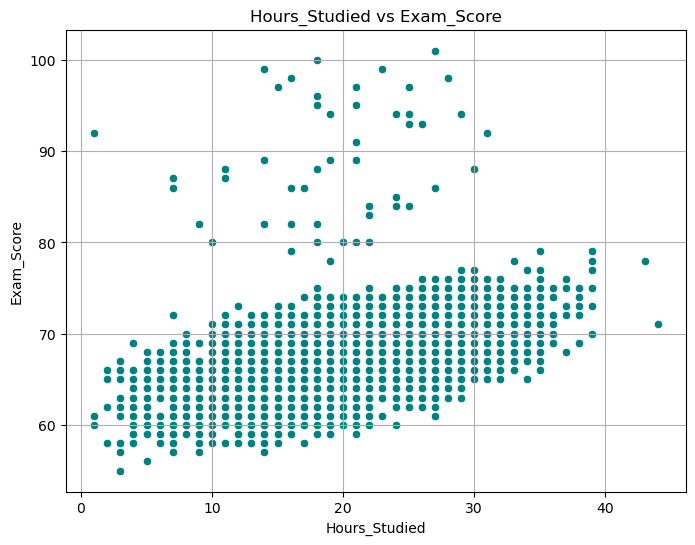

In [9]:
#scatter plot of 'Hours_Studied' vs 'Exam_Score'

x_col = 'Hours_Studied'  # can be replaced
y_col = 'Exam_Score'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=x_col, y=y_col, color='teal')
plt.title(f'{x_col} vs {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True)
plt.show()

In [11]:
#defining 
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#final shapes
print(f"\n Shapes:\nX_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


 Shapes:
X_train: (5102, 27), X_test: (1276, 27)
y_train: (5102,), y_test: (1276,)


Simple Linear Regression Results (Hours_Studied):
R²: 0.2051
MSE: 12.3517


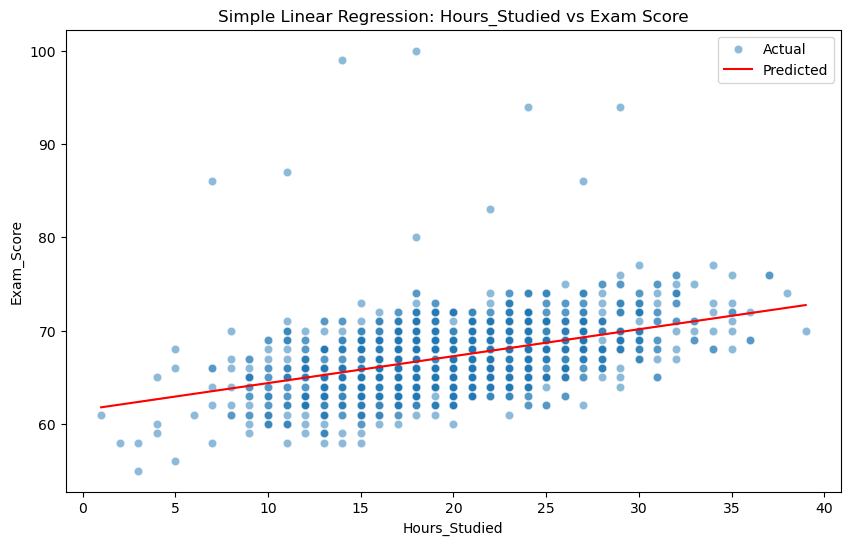

In [13]:
# Select the most correlated feature
selected_feature = 'Hours_Studied'   #can be replaced

# Prepare data for simple linear regression
X_simple = df[[selected_feature]]
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Fit the model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = simple_lr.predict(X_test_simple)

# Calculate metrics
r2_simple = r2_score(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)

print(f"Simple Linear Regression Results ({selected_feature}):")
print(f"R²: {r2_simple:.4f}")
print(f"MSE: {mse_simple:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple[selected_feature], y=y_test_simple, alpha=0.5, label='Actual')
sns.lineplot(x=X_test_simple[selected_feature], y=y_pred_simple, color='red', label='Predicted')
plt.title(f'Simple Linear Regression: {selected_feature} vs Exam Score')
plt.xlabel(selected_feature)
plt.ylabel('Exam_Score')
plt.legend()
plt.show()


Multiple Linear Regression Results:
R²: 0.5827
MSE: 6.4838

Coefficients:
Hours_Studied: 0.2912
Previous_Scores: 0.0465
Attendance: 0.1980
Sleep_Hours: -0.0316

Comparison:
Simple LR R²: 0.2051 vs Multiple LR R²: 0.5827
Simple LR MSE: 12.3517 vs Multiple LR MSE: 6.4838


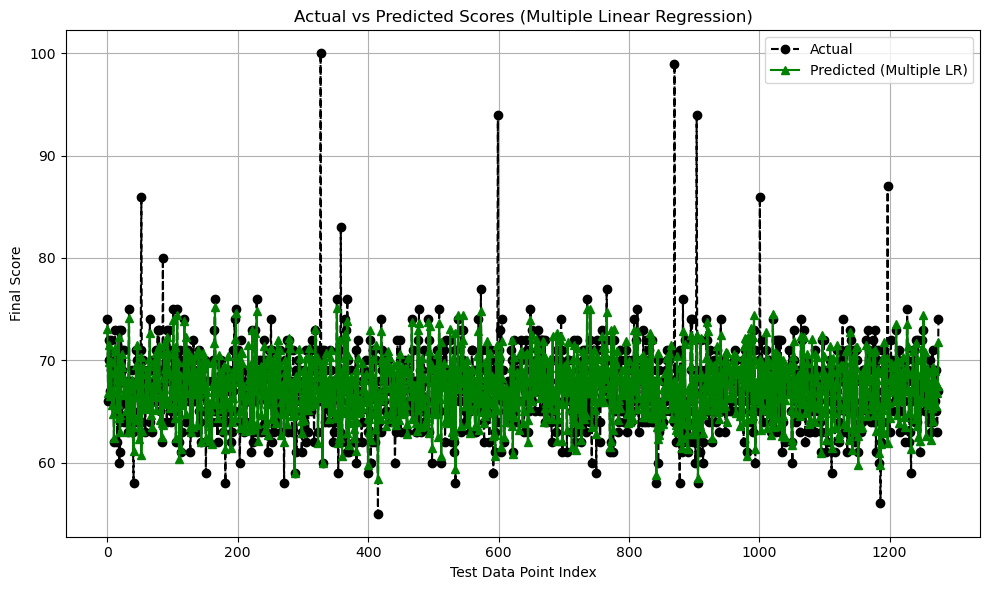

In [15]:
# Select top correlated features (for example)    
selected_features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours']

# Prepare data
X_multi = df[selected_features]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Fit the model
multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_lr.predict(X_test_multi)

# Calculate metrics
r2_multi = r2_score(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression Results:")
print(f"R²: {r2_multi:.4f}")
print(f"MSE: {mse_multi:.4f}")
print("\nCoefficients:")
for feature, coef in zip(selected_features, multi_lr.coef_):
    print(f"{feature}: {coef:.4f}")

# Compare with simple regression
print("\nComparison:")
print(f"Simple LR R²: {r2_simple:.4f} vs Multiple LR R²: {r2_multi:.4f}")
print(f"Simple LR MSE: {mse_simple:.4f} vs Multiple LR MSE: {mse_multi:.4f}")
import matplotlib.pyplot as plt

# --- Visualization: Actual vs Predicted (Multiple Linear Regression) ---
plt.figure(figsize=(10, 6))
plt.plot(y_test_multi.values, label='Actual', marker='o', linestyle='--', color='black')
plt.plot(y_pred_multi, label='Predicted (Multiple LR)', marker='^', color='green')

plt.title('Actual vs Predicted Scores (Multiple Linear Regression)')
plt.xlabel('Test Data Point Index')
plt.ylabel('Final Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

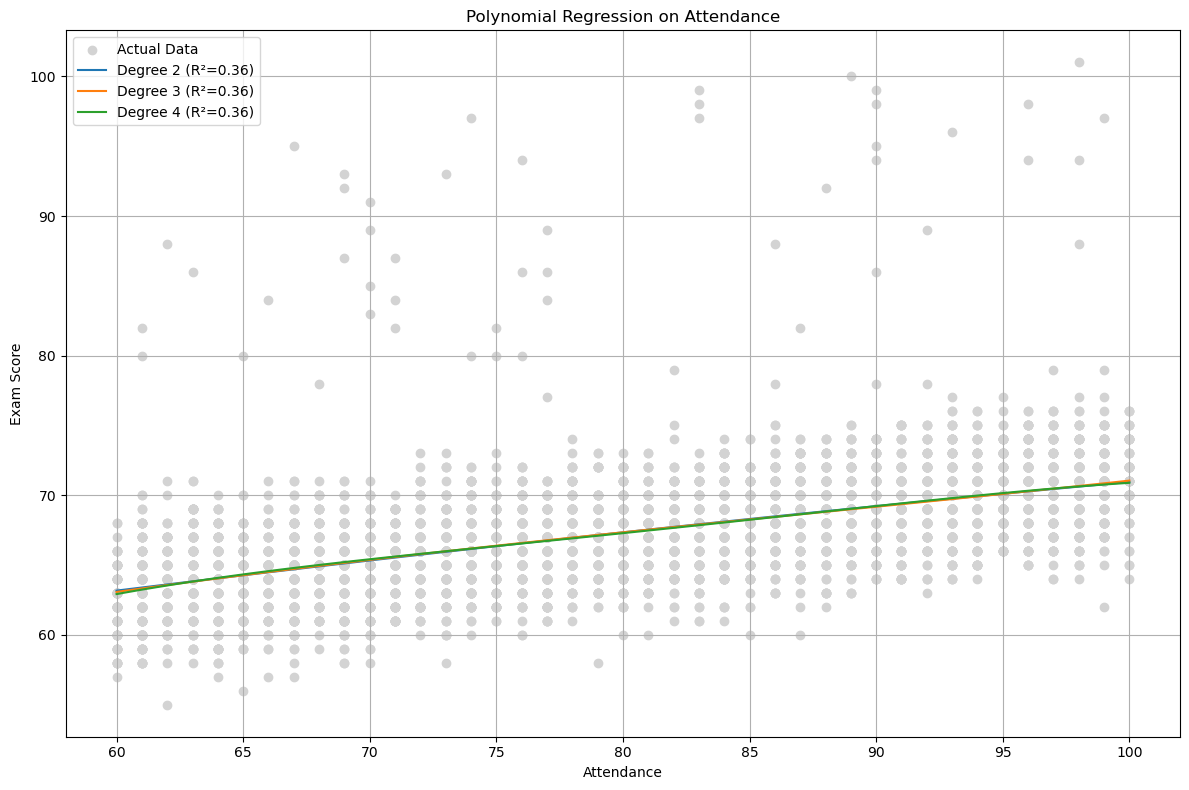

Polynomial Regression Results:
Degree 2 -> R²: 0.3571, MSE: 9.9904
Degree 3 -> R²: 0.3569, MSE: 9.9932
Degree 4 -> R²: 0.3579, MSE: 9.9778


In [17]:
# Select the best-performing feature
X = df[['Attendance']]
y = df['Exam_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
poly_results = {}
degrees = [2, 3, 4]

# Create range of X values for smooth plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Plot actual data
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='lightgray', label='Actual Data')

# Apply polynomial regression for degrees 2, 3, and 4
for degree in degrees:
    # Transform features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_range_poly = poly.transform(X_range)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_pred = model.predict(X_test_poly)
    y_range_pred = model.predict(X_range_poly)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    poly_results[degree] = {'r2': r2, 'mse': mse}

    # Plot
    plt.plot(X_range, y_range_pred, label=f'Degree {degree} (R²={r2:.2f})')

# Finalize plot
plt.title('Polynomial Regression on Attendance')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print("Polynomial Regression Results:")
for degree, metrics in poly_results.items():
    print(f"Degree {degree} -> R²: {metrics['r2']:.4f}, MSE: {metrics['mse']:.4f}")


In [19]:
selected_features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours']

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Select features and target
X = df[selected_features]
y = df['Exam_Score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, 'linear_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model and scaler saved!")


✅ Model and scaler saved!


In [ ]:
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('linear_model.pkl')
scaler = joblib.load('scaler.pkl')

# Suppose we want to predict for this new student:
new_data = {
    'Hours_Studied': 5,
    'Previous_Scores': 70,
    'Attendance': 85,z
    'Sleep_Hours': 6
}

# Convert to 2D array and scale
X_new = np.array([[new_data[feature] for feature in selected_features]])
X_new_scaled = scaler.transform(X_new)

# Predict
predicted_score = model.predict(X_new_scaled)
print(f"📈 Predicted Exam Score: {predicted_score[0]:.2f}")

📈 Predicted Exam Score: 63.68
